In [2]:
##1. 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##데이터
from sklearn.preprocessing import StandardScaler

##모델
from sklearn.cluster import KMeans


from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline

In [3]:
##엑셀불러오기
df_raw=pd.read_excel('220620_subway2.xlsx')
# df_raw=pd.read_excel('220620_subway3.xlsx')
df_raw

,호선,역명,길이(M),층규모,면적(㎡),준공년도,섬식,상대식,복합식,지상,지상+지하(복합),지하,환승유무,사용인원(22.05)_승하차/평균,임대상가면적
0,3,가락시장,205,4,16066.0,2010,0,1,0,0,0,1,1,8201.290320,21.00
1,8,가락시장,125,2,7728.1,1996,0,1,0,0,0,1,1,7367.338710,160.05
2,7,가산디지털단지,165,4,12551.5,2000,0,1,0,0,0,1,1,36395.758060,212.48
3,2,강남,205,2,6392.0,1982,0,1,0,0,0,1,1,75795.661290,183.22
4,7,강남구청,165,3,10359.3,2001,0,1,0,0,0,1,1,14980.532260,1320.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,3,홍제,205,3,9825.0,1985,1,0,0,0,0,1,0,16670.725810,1440.96
287,5,화곡,165,2,9127.7,1996,1,0,0,0,0,1,0,25676.241940,298.14
288,6,화랑대,165,2,10107.2,2000,0,1,0,0,0,1,0,10237.919350,239.60
289,4,회현,205,4,12024.8,1985,1,0,0,0,0,1,0,24119.322580,132.00


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   호선                  291 non-null    int64  
 1   역명                  291 non-null    object 
 2   길이(M)               291 non-null    int64  
 3   층규모                 291 non-null    int64  
 4   면적(㎡)               291 non-null    float64
 5   준공년도                291 non-null    int64  
 6   섬식                  291 non-null    int64  
 7   상대식                 291 non-null    int64  
 8   복합식                 291 non-null    int64  
 9   지상                  291 non-null    int64  
 10  지상+지하(복합)           291 non-null    int64  
 11  지하                  291 non-null    int64  
 12  환승유무                291 non-null    int64  
 13  사용인원(22.05)_승하차/평균  291 non-null    float64
 14  임대상가면적              291 non-null    float64
dtypes: float64(3), int64(11), object(1)
memory usage: 34.2+ K

In [5]:
df_raw.keys()

Index(['호선', '역명', '길이(M)', '층규모', '면적(㎡)', '준공년도', '섬식', '상대식', '복합식', '지상',
       '지상+지하(복합)', '지하', '환승유무', '사용인원(22.05)_승하차/평균', '임대상가면적'],
      dtype='object')

In [6]:
columns=['호선', '길이(M)', '층규모', '면적(㎡)', '준공년도', '섬식', '상대식', '복합식', '지상', '지상+지하(복합)', '지하', '환승유무', '사용인원(22.05)_승하차/평균', '임대상가면적']
columns

['호선',
 '길이(M)',
 '층규모',
 '면적(㎡)',
 '준공년도',
 '섬식',
 '상대식',
 '복합식',
 '지상',
 '지상+지하(복합)',
 '지하',
 '환승유무',
 '사용인원(22.05)_승하차/평균',
 '임대상가면적']

In [7]:
labels_f_index=np.array(df_raw['역명'])
labels_f_index

array(['가락시장', '가락시장', '가산디지털단지', '강남', '강남구청', '강동', '강동구청', '강변', '개롱',
       '개화산', '거여', '건대입구', '건대입구', '경복궁', '경찰병원', '고덕', '고려대', '고속터미널',
       '고속터미널', '공덕', '공덕', '공릉', '광나루', '광명사거리', '광화문', '광흥창', '교대',
       '교대', '구로디지털단지', '구산', '구의', '구파발', '군자', '군자', '굴포천', '굽은다리',
       '금호', '길동', '길음', '김포공항', '까치산', '까치울', '낙성대', '남구로', '남부터미널',
       '남성', '남태령', '남한산성입구', '내방', '노원', '노원', '녹번', '녹사평', '논현',
       '단대오거리', '답십리', '당고개', '당산', '대림', '대림', '대청', '대치', '대흥', '도곡',
       '도림천', '도봉산', '독립문', '독바위', '돌곶이', '동대문', '동대문', '동대문역사문화공원',
       '동대문역사문화공원', '동대문역사문화공원', '동대입구', '동묘앞', '동묘앞', '동작', '둔촌동',
       '둔촌오륜', '디지털미디어시티', '뚝섬', '뚝섬유원지', '마곡', '마들', '마장', '마천', '마포',
       '마포구청', '망원', '매봉', '먹골', '면목', '명동', '명일', '모란', '목동', '몽촌토성',
       '무악재', '문래', '문정', '미아', '미아사거리', '반포', '발산', '방배', '방이', '방화',
       '버티고개', '보라매', '보문', '복정', '봉은사', '봉천', '봉화산', '부천시청', '부천종합운동장',
       '부평구청', '불광', '불광', '사가정', '사당', '사당', '산성', '삼각지', '삼각지', '삼산체육관',
     

In [8]:
df_f_kmens=df_raw.drop(['역명'], axis=1)
df_f_kmens

,호선,길이(M),층규모,면적(㎡),준공년도,섬식,상대식,복합식,지상,지상+지하(복합),지하,환승유무,사용인원(22.05)_승하차/평균,임대상가면적
0,3,205,4,16066.0,2010,0,1,0,0,0,1,1,8201.290320,21.00
1,8,125,2,7728.1,1996,0,1,0,0,0,1,1,7367.338710,160.05
2,7,165,4,12551.5,2000,0,1,0,0,0,1,1,36395.758060,212.48
3,2,205,2,6392.0,1982,0,1,0,0,0,1,1,75795.661290,183.22
4,7,165,3,10359.3,2001,0,1,0,0,0,1,1,14980.532260,1320.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,3,205,3,9825.0,1985,1,0,0,0,0,1,0,16670.725810,1440.96
287,5,165,2,9127.7,1996,1,0,0,0,0,1,0,25676.241940,298.14
288,6,165,2,10107.2,2000,0,1,0,0,0,1,0,10237.919350,239.60
289,4,205,4,12024.8,1985,1,0,0,0,0,1,0,24119.322580,132.00


In [9]:
##수치형 데이터 표준화
stdsc=StandardScaler()
df_stdsc_ed=pd.DataFrame(stdsc.fit_transform(df_f_kmens))
df_stdsc_ed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.858248,1.108054,1.055698,2.127000,1.617360,-0.605142,0.679935,-0.224814,-0.292952,-0.168133,0.345298,1.301708,-0.521218,-0.432325
1,1.445721,-2.175906,-0.852427,-0.310189,0.196678,-0.605142,0.679935,-0.224814,-0.292952,-0.168133,0.345298,1.301708,-0.592966,-0.186349
2,0.984927,-0.533926,1.055698,1.099703,0.602587,-0.605142,0.679935,-0.224814,-0.292952,-0.168133,0.345298,1.301708,1.904446,-0.093602
3,-1.319042,1.108054,-0.852427,-0.700735,-1.224005,-0.605142,0.679935,-0.224814,-0.292952,-0.168133,0.345298,1.301708,5.294152,-0.145362
4,0.984927,-0.533926,0.101636,0.458917,0.704064,-0.605142,0.679935,-0.224814,-0.292952,-0.168133,0.345298,1.301708,0.062023,1.865570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,-0.858248,1.108054,0.101636,0.302740,-0.919573,1.652504,-1.470729,-0.224814,-0.292952,-0.168133,0.345298,-0.768221,0.207436,2.079545
287,0.063339,-0.533926,-0.852427,0.098917,0.196678,1.652504,-1.470729,-0.224814,-0.292952,-0.168133,0.345298,-0.768221,0.982210,0.057928
288,0.524133,-0.533926,-0.852427,0.385228,0.602587,-0.605142,0.679935,-0.224814,-0.292952,-0.168133,0.345298,-0.768221,-0.346000,-0.045628
289,-0.397455,1.108054,1.055698,0.945747,-0.919573,1.652504,-1.470729,-0.224814,-0.292952,-0.168133,0.345298,-0.768221,0.848263,-0.235969


In [10]:
# df.index = labels_f_index
# df.columns = columns
# df

In [12]:
kmeans=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=1).fit(df_f_kmens)
y_km = kmeans.labels_

In [13]:
df_cluster=pd.DataFrame(y_km)
# df_cluster.index=labels_f_index
# df_f_kmens.index=labels_f_index
df_cluster.columns=['cluster']

df_cluster.info()
df_kmeans_ed = pd.concat([df_f_kmens,df_cluster], axis=1)
df_kmeans_ed.to_clipboard()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cluster  291 non-null    int32
dtypes: int32(1)
memory usage: 1.3 KB


c:\Users\shahn.EANTEC\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


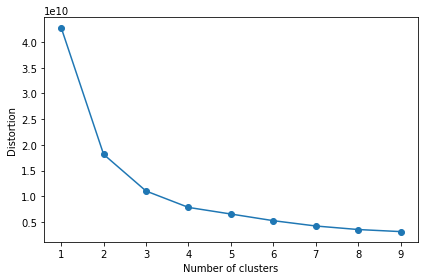

In [14]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=1)
    km.fit(df_kmeans_ed)
    distortions.append(km.inertia_)
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()    

c:\Users\shahn.EANTEC\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


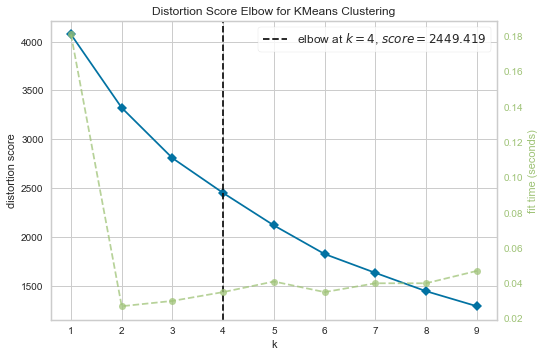

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_stdsc_ed)
visualizer.show()

In [18]:
# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(df_f_kmens, df_kmeans_ed['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
df_kmeans_ed['silhouette_coeff'] = score_samples

silhouette_samples( ) return 값의 shape (291,)


In [19]:
# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(df_f_kmens, df_kmeans_ed['cluster'])
print('지하철 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

지하철 데이터셋 Silhouette Analysis Score:0.431


<AxesSubplot:>

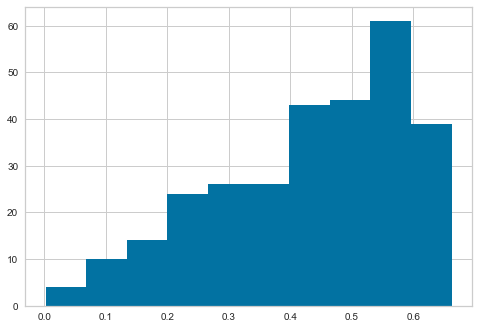

In [20]:
df_kmeans_ed['silhouette_coeff'].hist()

In [21]:
df_kmeans_ed.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.428715
1    0.466405
2    0.429968
3    0.377449
Name: silhouette_coeff, dtype: float64

In [25]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

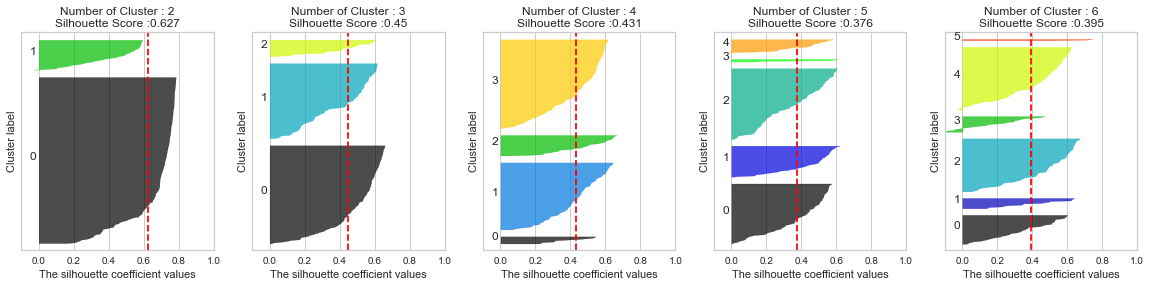

In [28]:
visualize_silhouette([ 2,3, 4, 5,6 ], df_kmeans_ed)

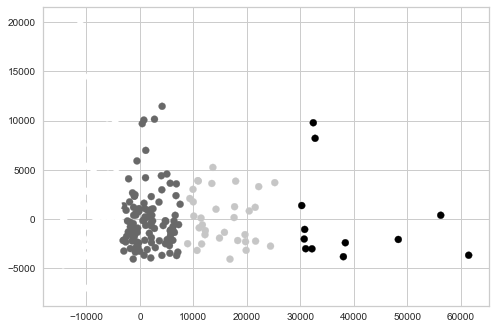

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_f_kmens)

df_kmeans_ed['pca_x'] = pca_transformed[:,0]
df_kmeans_ed['pca_y'] = pca_transformed[:,1]
df_kmeans_ed.head(3)

plt.scatter(x=df_kmeans_ed.loc[:, 'pca_x'], y=df_kmeans_ed.loc[:, 'pca_y'], c=df_kmeans_ed['cluster']) 

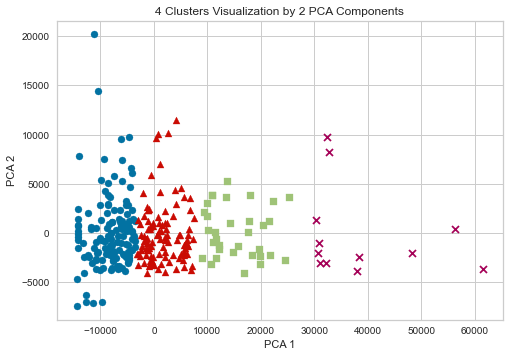

In [31]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = df_kmeans_ed[df_kmeans_ed['cluster']==0].index
marker1_ind = df_kmeans_ed[df_kmeans_ed['cluster']==1].index
marker2_ind = df_kmeans_ed[df_kmeans_ed['cluster']==2].index
marker3_ind = df_kmeans_ed[df_kmeans_ed['cluster']==3].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=df_kmeans_ed.loc[marker0_ind,'pca_x'], y=df_kmeans_ed.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=df_kmeans_ed.loc[marker1_ind,'pca_x'], y=df_kmeans_ed.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=df_kmeans_ed.loc[marker2_ind,'pca_x'], y=df_kmeans_ed.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x=df_kmeans_ed.loc[marker3_ind,'pca_x'], y=df_kmeans_ed.loc[marker3_ind,'pca_y'], marker='x')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('4 Clusters Visualization by 2 PCA Components')
plt.show()

In [32]:
https://gaussian37.github.io/ml-concept-t_sne/


from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x = tsne.fit_transform(df_kmeans_ed)
df_tsne = pd.DataFrame(x)
df_tsne['cluster'] = df_kmeans_ed['cluster']
df_tsne.columns = ['axis_0','axis_1','cluster']
df_tsne.head()

c:\Users\shahn.EANTEC\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\shahn.EANTEC\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,axis_0,axis_1,cluster
0,-4.759122,12.482196,0
1,-8.467669,6.126353,0
2,21.738680,-15.412717,1
3,25.613686,-16.922697,3
4,5.701052,-5.046762,2


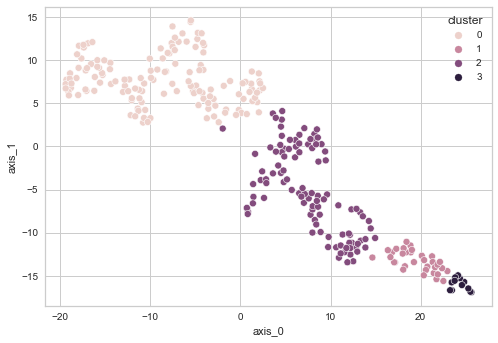

In [35]:
import seaborn as sns
tsne_graph = sns.scatterplot(x='axis_0', y='axis_1', hue='cluster', data=df_tsne)

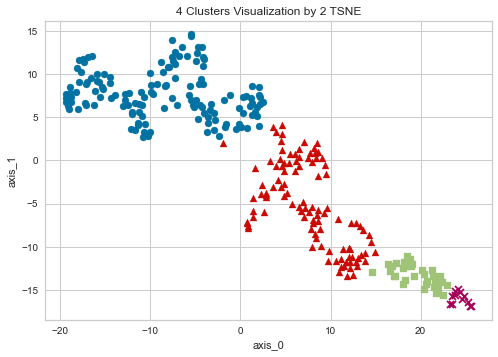

In [37]:
https://gaussian37.github.io/ml-concept-t_sne/

# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = df_tsne[df_tsne['cluster']==0].index
marker1_ind = df_tsne[df_tsne['cluster']==1].index
marker2_ind = df_tsne[df_tsne['cluster']==2].index
marker3_ind = df_tsne[df_tsne['cluster']==3].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 axis_0, axis_1 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=df_tsne.loc[marker0_ind,'axis_0'], y=df_tsne.loc[marker0_ind,'axis_1'], marker='o') 
plt.scatter(x=df_tsne.loc[marker1_ind,'axis_0'], y=df_tsne.loc[marker1_ind,'axis_1'], marker='s')
plt.scatter(x=df_tsne.loc[marker2_ind,'axis_0'], y=df_tsne.loc[marker2_ind,'axis_1'], marker='^')
plt.scatter(x=df_tsne.loc[marker3_ind,'axis_0'], y=df_tsne.loc[marker3_ind,'axis_1'], marker='x')

plt.xlabel('axis_0')
plt.ylabel('axis_1')
plt.title('4 Clusters Visualization by 2 TSNE')
plt.show()

In [38]:
df_kmeans_ed.groupby(['cluster']).count()

,호선,길이(M),층규모,면적(㎡),준공년도,섬식,상대식,복합식,지상,지상+지하(복합),지하,환승유무,사용인원(22.05)_승하차/평균,임대상가면적,silhouette_coeff,pca_x,pca_y
cluster,,,,,,,,,,,,,,,,,
0,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140
1,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
2,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106
3,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [39]:
df_kmeans_ed.groupby(['cluster']).mean()

,호선,길이(M),층규모,면적(㎡),준공년도,섬식,상대식,복합식,지상,지상+지하(복합),지하,환승유무,사용인원(22.05)_승하차/평균,임대상가면적,silhouette_coeff,pca_x,pca_y
cluster,,,,,,,,,,,,,,,,,
0,5.592857,169.142857,3.085714,8652.045000,1998.928571,0.278571,0.685714,0.035714,0.057143,0.035714,0.907143,0.335714,6184.129623,147.085071,0.428715,-8077.431607,23.712462
1,3.151515,199.242424,2.636364,9261.763636,1985.303030,0.212121,0.757576,0.030303,0.181818,0.000000,0.818182,0.454545,29578.143206,289.689394,0.466405,15324.305871,155.841068
2,4.754717,180.000000,2.792453,8749.299057,1991.707547,0.254717,0.679245,0.066038,0.075472,0.028302,0.896226,0.367925,15793.546561,345.993396,0.429968,1533.597828,-67.276399
3,2.000000,205.416667,2.250000,9444.483333,1982.166667,0.416667,0.500000,0.083333,0.083333,0.000000,0.916667,0.583333,52798.049770,866.873333,0.377449,38548.080128,-110.933469
